<a href="https://colab.research.google.com/github/WilsonDuraes/MackDataScience/blob/main/Dicion%C3%A1rio_de_Texto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Esta é uma atividade posta pelo curso de [Pós-Graduação de Ciência de Dados (Big Data Processing and Analytics)](https://www.mackenzie.br/pos-graduacao/especializacao/ead/ciencia-de-dados-big-data-processing) da Universidade Presbiteriana Mackenzie.

Este é um programa em Python que constrói um dicionário de termos de um documento com a frequência de cada termo permitindo confirmar a lei de Zipf para o documento selecionado.

# Aquisição dos Dados

In [28]:
!pip install html2text

import requests
import html2text

upload = requests.get('https://docs.google.com/document/d/e/2PACX-1vSPPz7Wnr-vN75bNoyK0WrS9zLABfYMworylFRUCdOof0SFGDWKjy-Y4oA18rGMofAMsTb1JlOqVzKf/pub').text

texto = html2text.html2text(upload)

texto.replace('\n',' ')
texto.replace('.',' ')
texto.replace(',',' ')
texto.replace('(',' ')
texto.replace(')',' ')
texto.replace('?',' ')
texto.replace('\'',' ')

words = texto.split(' ')

O texto usado foi gerado por um site chamado "[O Fabuloso Gerador de Lero-lero](http://lerolero.bgnweb.com.br/leroleroti.html)". Achei interessante pegar um texto gerado por uma máquina exatamente pela sua finalidade: encher linguiça. Como será que a máquina pensa que consegue coerência o suficiente para preencher um texto todo que fala muito e não diz nada?

Usei basicamente o mesmo método de tratamento de texto que foi feito no exemplo. Não é um texto incrivelmente trabalhado nem tem tantas pontuações. Mas também tive que adicionar um tratamento de HTML por conta do Google Docs interferir muito na obtenção dos dados.

# Construção do Dicionário

In [29]:
mydict = {}                             # crie um dicionário vazio

for word in words:                      # para cada palavra em words
  if word not in mydict.keys():         # se palavra não está no dicionário 
    mydict[word] = 1                    # acrescenta a word com o valor 1
  else:                                 # se a entrada já existe 
    mydict[word] =  mydict[word] + 1    # apenas soma 1 ao valor já existente

print(mydict)

{'Published': 1, 'using': 1, 'Google': 1, 'Docs\n\n[Learn': 1, 'More](https://support.google.com/docs/answer/183965': 1, '"Learn\nmore")[Report\nAbuse](https://docs.google.com/abuse?id=AKkXjoyZYA8iEHJEm41s7RGVK9xsAbAl3ow2g15ABequiKW1Dqx2Sb6DCiusI9rEZLFM7o0d7uherd9Z7j-i4uU:0)\n\nO': 1, 'Processo': 2, 'de': 312, 'Implantação': 2, 'do': 52, 'Novo': 2, 'Serviço': 2, 'Corporativo': 2, 'TI\n\nUpdated': 1, 'automatically': 1, 'every': 1, '5': 1, 'minutes\n\nO': 1, 'TI\n\nGerado': 1, 'no': 21, 'Fabuloso': 1, 'Gerador': 1, 'Lero-Lero\n\nNo': 1, 'entanto,': 5, 'não': 15, 'podemos': 5, 'esquecer': 4, 'que': 101, 'a': 207, 'implementação': 6, 'código': 4, 'talvez': 6, 'venha\ncausar': 1, 'instabilidade': 5, 'da': 73, 'confidencialidade': 6, 'imposta': 5, 'pelo': 15, 'sistema': 15, 'senhas.': 4, 'A\nimplantação,': 2, 'na': 30, 'prática,': 6, 'prova': 6, 'necessidade': 12, 'cumprimento': 5, 'dos': 120, 'SLAs\npreviamente': 1, 'acordados': 4, 'acarreta': 6, 'um': 32, 'processo': 12, 'reformulação': 5

# Exibição dos Resultados

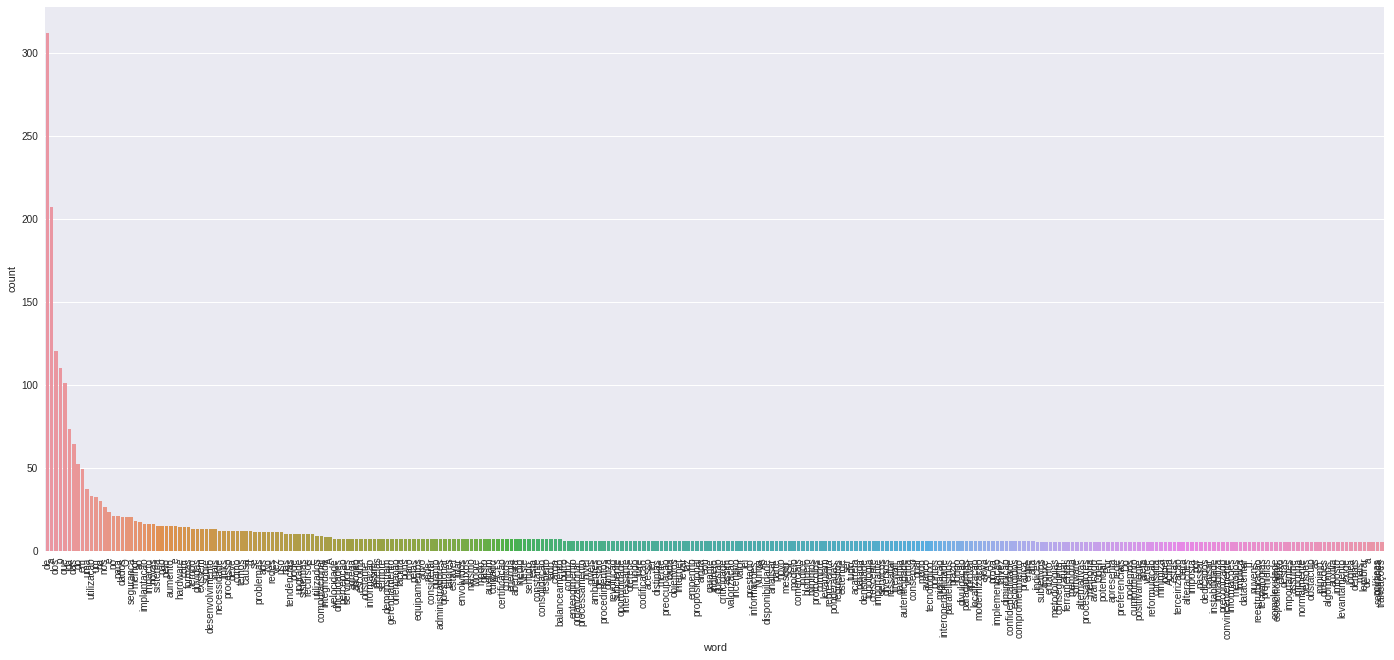

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

df = pd.DataFrame(mydict.items(),  columns=['word', 'count']).sort_values('count',ascending=False)
df = df[df['count'] > 4] # somente termos com mais de 4 ocorrências
# df = df.iloc[ np.int(len(df)/2) - 10 : np.int(len(df)/2) + 10 ] # para livros ou textos com muitos termos limita a um número mínimo de termos

plt.figure(figsize=(24,10))
mpl.style.use(['seaborn'])
sns.barplot(x=df.word,y=df['count'])
plt.xticks(rotation=90) 

plt.show()

Infelizmente, não pude filtrar os artigos do texto; o que fez com que a maior parte das palavras fossem eles. Além disso, ainda sobraram resquícios dos códigos de HTML.

Porém, podemos ver o arrodeio que o programa faz para poder fazer um texto que realmente engane o leitor. A quantidade de termos técnicos e artigos que poderiam ser facilmente cortados do texto fazem com que o gerador cumpra bem o seu papel de lero-lero.